In [25]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.decomposition import PCA
from statsmodels import multivariate
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo

In [27]:
# Loading the dataframe
df = pd.read_csv("Customer_financial_profiles.csv")

In [29]:
# Display the first 5 rows
df.head()

,id,current_age,birth_year,birth_month,gender,address,per_capita_income,yearly_income,total_debt,credit_score,...,transaction_id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip
0,1,64,1961,3,Female,"Street 286, Indore, Madhya Pradesh - 452645",86125,1033501,280435,715,...,1251,2024-03-28,CLTIND00104,CRD001042,1483.94,Yes,MCH00496,Mumbai,Maharashtra,452645
1,2,39,1986,12,Female,"Street 268, Kolkata, West Bengal - 700555",68414,820965,0,834,...,9976,2025-09-20,CLTIND00213,CRD002132,1274.72,Yes,MCH00374,Mumbai,Maharashtra,700555
2,3,50,1975,7,Female,"Street 262, Lucknow, Uttar Pradesh - 226797",22595,271138,0,609,...,6084,2024-10-02,CLTIND03292,CRD032922,7622.04,No,MCH00108,Kolkata,West Bengal,226797
3,4,27,1998,2,Male,"Street 265, Nagpur, Maharashtra - 440623",24158,289898,0,782,...,3350,2023-09-02,CLTIND05205,CRD052053,3970.48,Yes,MCH00001,Indore,Madhya Pradesh,440623
4,5,45,1980,7,Other,"Street 157, Delhi, Delhi - 110965",45475,545697,117821,608,...,11725,2025-05-25,CLTIND04910,CRD049101,418.45,No,MCH00254,Bengaluru,Karnataka,110965


In [31]:
# Check datatype appropriateness of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 20000 non-null  int64  
 1   current_age        20000 non-null  int64  
 2   birth_year         20000 non-null  int64  
 3   birth_month        20000 non-null  int64  
 4   gender             20000 non-null  object 
 5   address            20000 non-null  object 
 6   per_capita_income  20000 non-null  int64  
 7   yearly_income      20000 non-null  int64  
 8   total_debt         20000 non-null  int64  
 9   credit_score       20000 non-null  int64  
 10  num_credit_cards   20000 non-null  int64  
 11  transaction_id     20000 non-null  int64  
 12  date               20000 non-null  object 
 13  client_id          20000 non-null  object 
 14  card_id            20000 non-null  object 
 15  amount             20000 non-null  float64
 16  use_chip           200

In [33]:
# Check duplicated values
df.duplicated().sum()

0

In [35]:
# Check null values
df.isnull().sum()

id                   0
current_age          0
birth_year           0
birth_month          0
gender               0
address              0
per_capita_income    0
yearly_income        0
total_debt           0
credit_score         0
num_credit_cards     0
transaction_id       0
date                 0
client_id            0
card_id              0
amount               0
use_chip             0
merchant_id          0
merchant_city        0
merchant_state       0
zip                  0
dtype: int64

In [37]:
df3 = df.drop(['id', 'birth_year', 'birth_month', 'transaction_id', 'zip'], axis=1)

In [41]:
# 1. Drop all object (string) columns
df3_numeric = df3.select_dtypes(exclude=['object'])


In [43]:
df_scaled = df3_numeric.apply(zscore)

In [45]:


df_scaled.head()

,current_age,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,amount
0,1.320018,0.704051,0.704053,0.838627,0.156123,1.828961,-0.754995
1,-0.347522,0.203080,0.203073,-0.773334,1.701738,0.108598,-0.853823
2,0.386196,-1.092948,-1.092953,-0.773334,-1.220643,-0.751584,2.144399
3,-1.147942,-1.048737,-1.048733,-0.773334,1.026343,0.108598,0.419547
4,0.052688,-0.445768,-0.445775,-0.096090,-1.233631,-0.751584,-1.258291


In [47]:
df_scaled.describe()

,current_age,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,amount
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,1.930900e-16,3.907985e-17,-3.836931e-17,-2.060574e-17,4.229506e-16,1.856293e-16,3.055334e-17
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.681554e+00,-1.378494e+00,-1.378494e+00,-7.733341e-01,-3.662454e+00,-1.611766e+00,-1.406276e+00
25%,-8.811351e-01,-7.230826e-01,-7.230945e-01,-7.733341e-01,-7.140967e-01,-7.515838e-01,-7.326800e-01
50%,-1.401401e-02,-1.792875e-01,-1.792781e-01,-2.991009e-01,-5.169042e-02,1.085979e-01,-2.270337e-01
75%,8.531070e-01,3.849017e-01,3.849135e-01,3.812927e-01,7.016344e-01,9.687797e-01,4.883582e-01
max,1.720228e+00,5.339391e+00,5.339392e+00,9.673121e+00,2.558970e+00,1.828961e+00,7.899914e+00


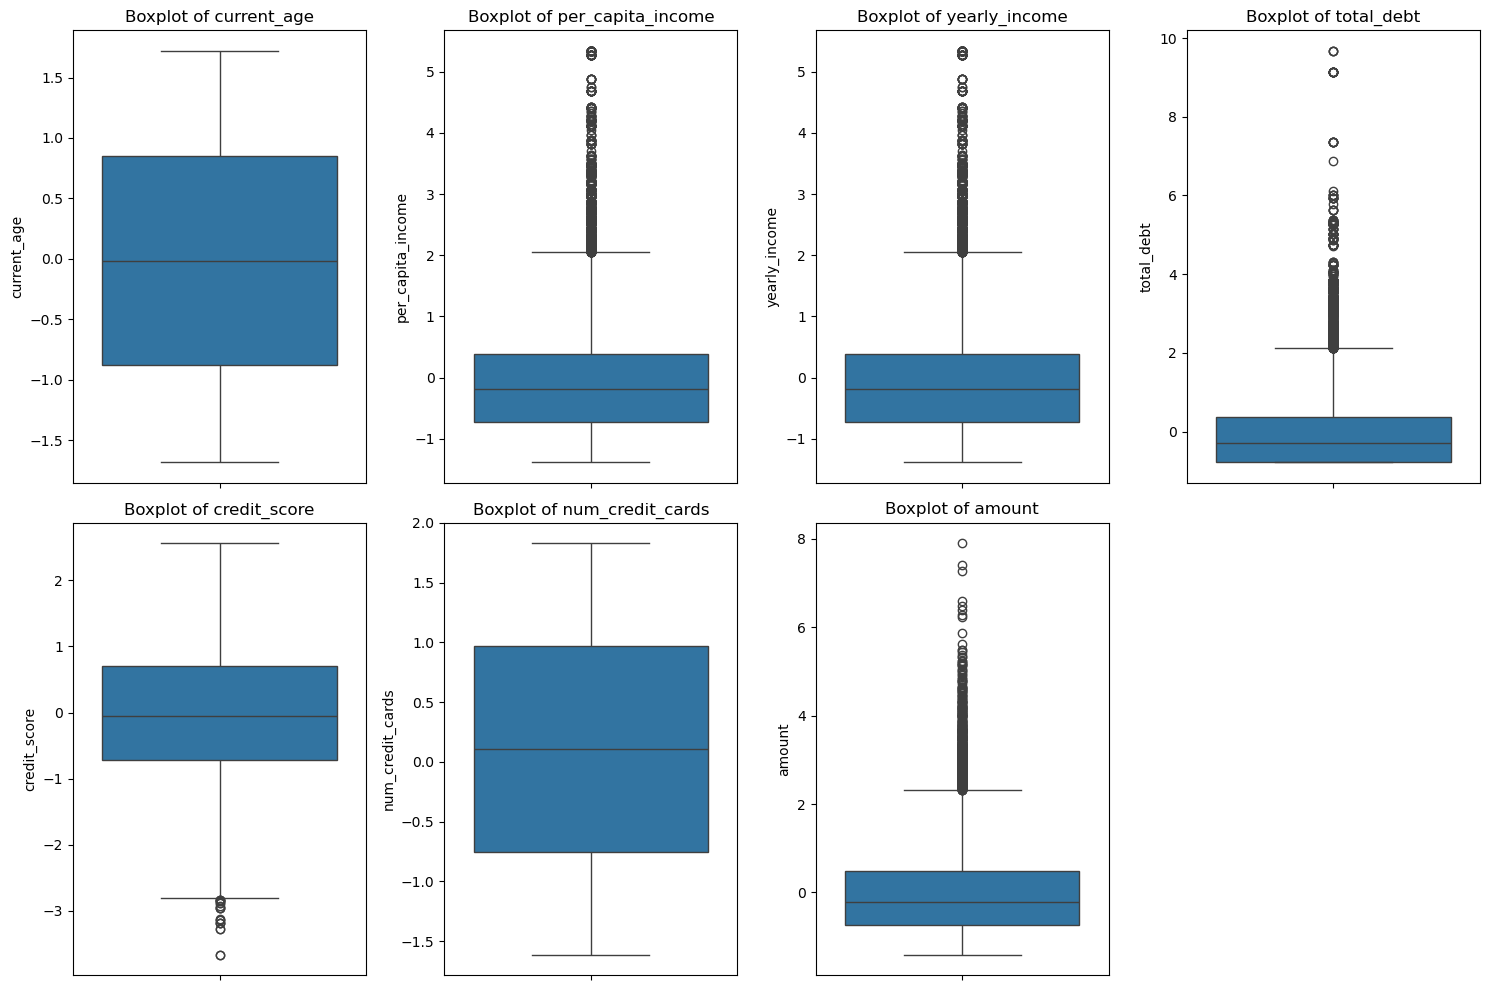

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Replace df with your dataset name
df_numeric = df_scaled.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
feature_list = df_numeric.columns

for i in range(len(feature_list)):
    plt.subplot((len(feature_list) // 4) + 1, 4, i + 1)
    sns.boxplot(y=df_numeric[feature_list[i]])
    plt.title(f'Boxplot of {feature_list[i]}')
    plt.tight_layout()

plt.show()


In [57]:
import pandas as pd

def remove_outliers_iqr(df_numeric):
    df_clean = df_numeric.copy()
    numeric_cols = df_clean.select_dtypes(include=['int64', 'float64']).columns
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    
    return df_clean

# Use it on your dataset
df_no_outliers = remove_outliers_iqr(df)
df_no_outliers.shape

(16654, 21)

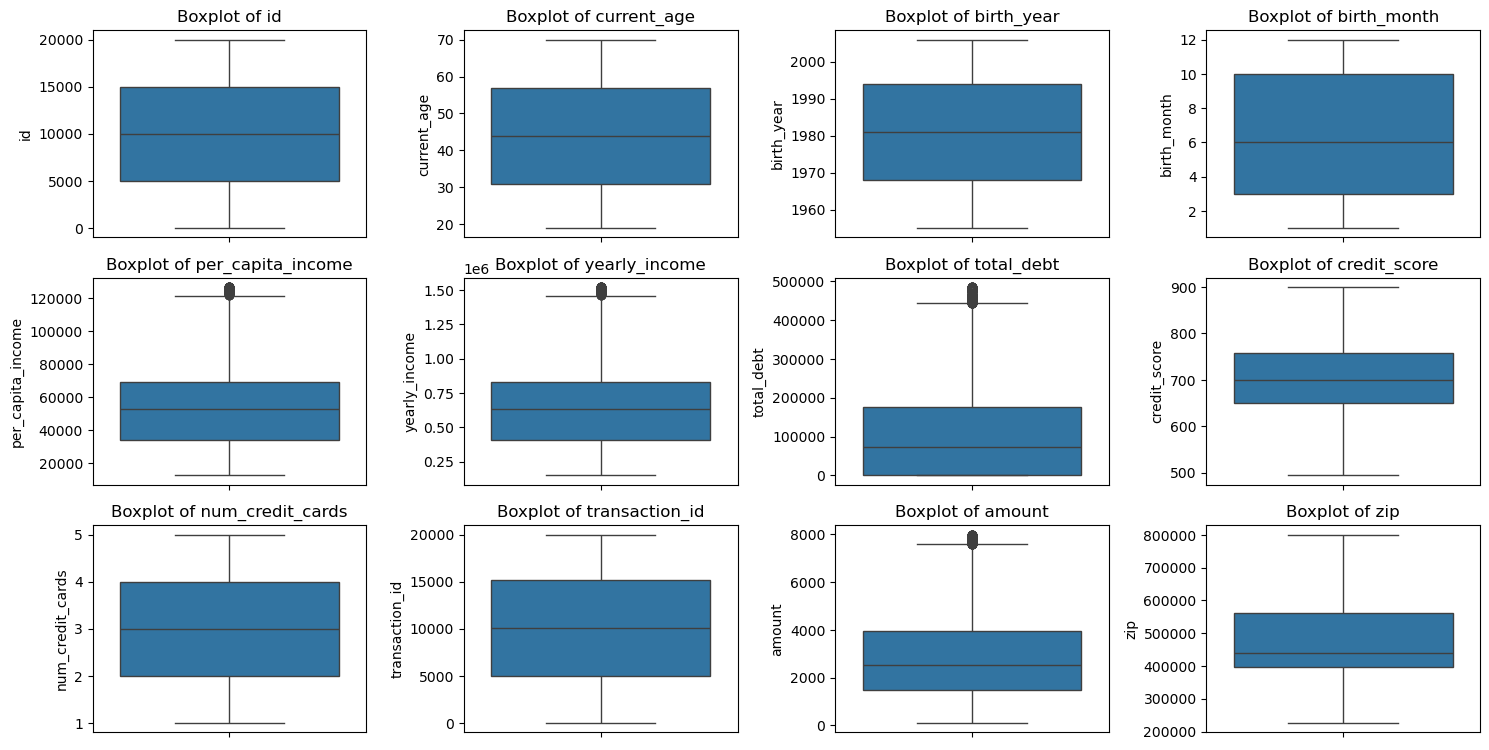

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use your cleaned dataset
df_numeric = df_no_outliers.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(15, 10))
feature_list = df_numeric.columns

for i in range(len(feature_list)):
    plt.subplot((len(feature_list) // 4) + 1, 4, i + 1)
    sns.boxplot(y=df_numeric[feature_list[i]])
    plt.title(f'Boxplot of {feature_list[i]}')
    plt.tight_layout()

plt.show()

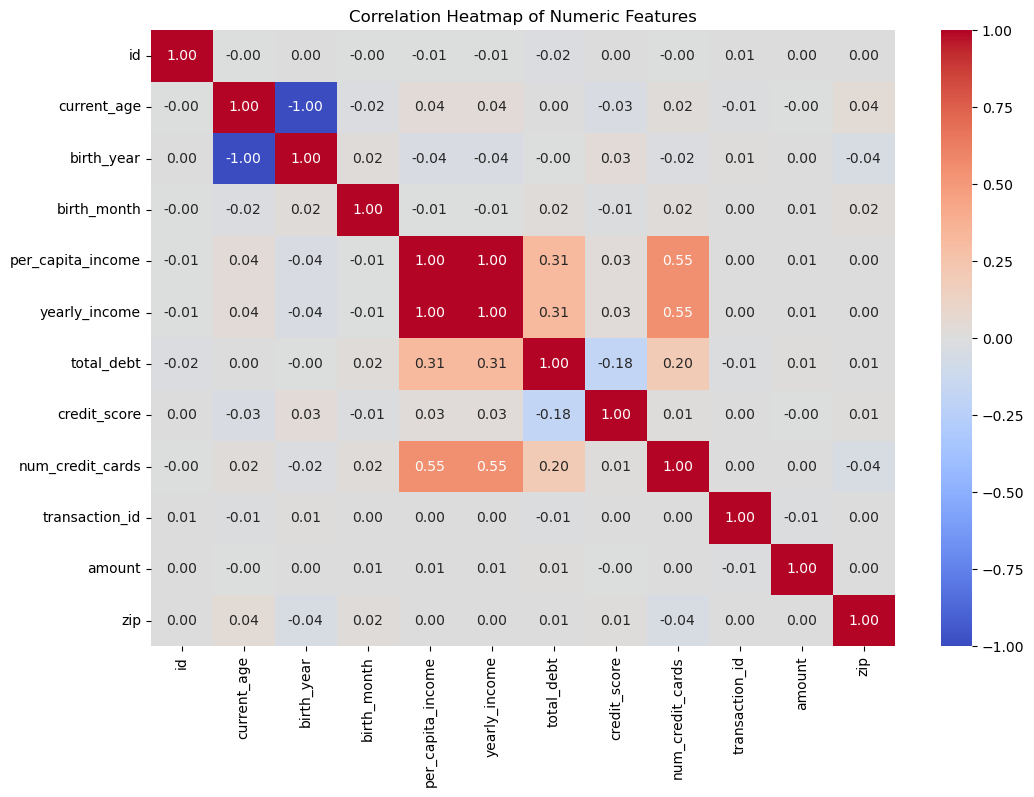

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


In [63]:
df_numeric.head()

,id,current_age,birth_year,birth_month,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,transaction_id,amount,zip
0,1,64,1961,3,86125,1033501,280435,715,5,1251,1483.94,452645
1,2,39,1986,12,68414,820965,0,834,3,9976,1274.72,700555
2,3,50,1975,7,22595,271138,0,609,2,6084,7622.04,226797
3,4,27,1998,2,24158,289898,0,782,3,3350,3970.48,440623
5,6,23,2002,6,57403,688831,207894,652,5,3728,5533.61,440496


In [65]:
df3 = df_numeric.drop(['id', 'birth_year', 'birth_month', 'transaction_id', 'zip'], axis=1)

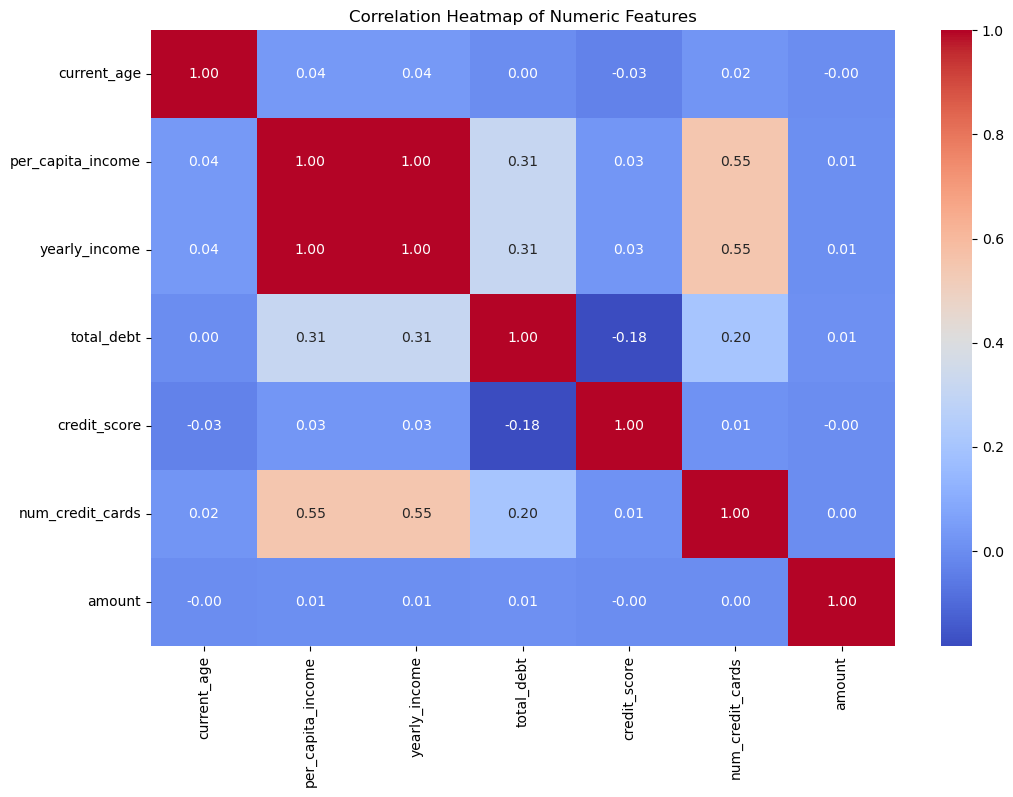

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.heatmap(df3.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

In [69]:
np.round(df3.cov(),2) 

,current_age,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards,amount
current_age,225.39,1.297451e+04,1.556947e+05,1.449860e+03,-40.11,0.39,-26.28
per_capita_income,12974.51,6.056097e+08,7.267314e+09,9.319705e+08,48598.99,15799.48,267033.55
yearly_income,155694.74,7.267314e+09,8.720775e+10,1.118364e+10,583182.84,189593.58,3204443.49
total_debt,1449.86,9.319705e+08,1.118364e+10,1.466908e+10,-1694839.84,28457.99,1824500.17
credit_score,-40.11,4.859899e+04,5.831828e+05,-1.694840e+06,5851.53,1.31,-145.08
num_credit_cards,0.39,1.579948e+04,1.895936e+05,2.845799e+04,1.31,1.35,1.44
amount,-26.28,2.670335e+05,3.204443e+06,1.824500e+06,-145.08,1.44,3008020.23


In [71]:
#Confirm the statistical significance of correlations
#H0: Correlation are not significant, H1: There are significant correlations
#Reject H0 if p-value < 0.05
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(df3)
p_value

0.0

In [73]:
#Confirm the adequacy of sample size
#Note: Above 0.7 is good, below 0.5 is not acceptable (Solution: Collect more data)
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df3)
kmo_model

0.6428898333370036

In [75]:
#Apply PCA taking all factors
from sklearn.decomposition import PCA
pca = PCA(n_components=5, random_state=123) #consider all the features n_components=5.
pca_transformed = pca.fit_transform(df3)

In [77]:
# Extract eigen vectors
pca.components_

array([[ 1.72879939e-06,  8.21269861e-02,  9.85523617e-01,
         1.48318429e-01,  3.65775083e-06,  2.14944081e-06,
         3.85569222e-05],
       [-1.67400765e-06, -1.23171550e-02, -1.47806104e-01,
         9.88939641e-01, -1.35753525e-04, -5.73396795e-09,
         1.02241290e-04],
       [-9.98371178e-06, -3.06232976e-06, -2.27907682e-05,
        -1.06828179e-04,  7.50738151e-06, -1.98612515e-06,
         9.99999994e-01],
       [-8.09919696e-03,  7.86437116e-05, -3.03713762e-05,
         1.33694588e-04,  9.99967183e-01,  1.06720543e-04,
        -7.57395227e-06],
       [ 9.99967140e-01, -2.17430719e-04,  1.59606931e-05,
         2.48083144e-06,  8.09918482e-03,  2.72893203e-04,
         9.92308504e-06]])

In [79]:
# Check the eigen values
#note: This is always returned in descending order
pca.explained_variance_

array([8.94964687e+10, 1.29859737e+10, 3.00775147e+06, 5.61137056e+03,
       2.24733895e+02])

In [81]:
# Check the explained variance for each PC
#note: Explained variance = (eigen value of each PC)/(sum of eigen values of all PCs)
pca.explained_variance_ratio_

array([8.73260189e-01, 1.26710405e-01, 2.93480810e-05, 5.47528477e-08,
       2.19283695e-09])

In [83]:
# Create a dataframe containing the loadings or coefficients of all PCs
df_extracted_loadings = pd.DataFrame(pca.components_.T,
                                     columns = ['PC1','PC2','PC3','PC4','PC5'],
                                     index = df3.columns)

In [85]:
np.round((df_extracted_loadings),2)

,PC1,PC2,PC3,PC4,PC5
current_age,0.00,-0.00,-0.0,-0.01,1.00
per_capita_income,0.08,-0.01,-0.0,0.00,-0.00
yearly_income,0.99,-0.15,-0.0,-0.00,0.00
total_debt,0.15,0.99,-0.0,0.00,0.00
credit_score,0.00,-0.00,0.0,1.00,0.01
num_credit_cards,0.00,-0.00,-0.0,0.00,0.00
amount,0.00,0.00,1.0,-0.00,0.00


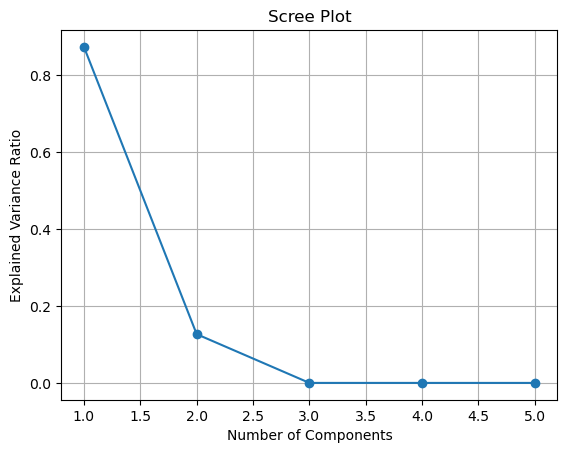

In [89]:
plt.plot(
    range(1, len(pca.explained_variance_ratio_) + 1),
    pca.explained_variance_ratio_,
    marker='o'
)
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot")
plt.grid()
plt.show()


In [91]:
# Check the cumulative explained variance ratio to find a cut off for selecting the number of PCs
np.cumsum(pca.explained_variance_ratio_)

array([0.87326019, 0.99997059, 0.99999994, 1.        , 1.        ])

In [93]:
# Choose the PCs on the basis of cumulative explained variance
df_selected = df_extracted_loadings[['PC1','PC2']]
# Check the selected PCs
df_selected

,PC1,PC2
current_age,0.000002,-1.674008e-06
per_capita_income,0.082127,-1.231715e-02
yearly_income,0.985524,-1.478061e-01
total_debt,0.148318,9.889396e-01
credit_score,0.000004,-1.357535e-04
num_credit_cards,0.000002,-5.733968e-09
amount,0.000039,1.022413e-04


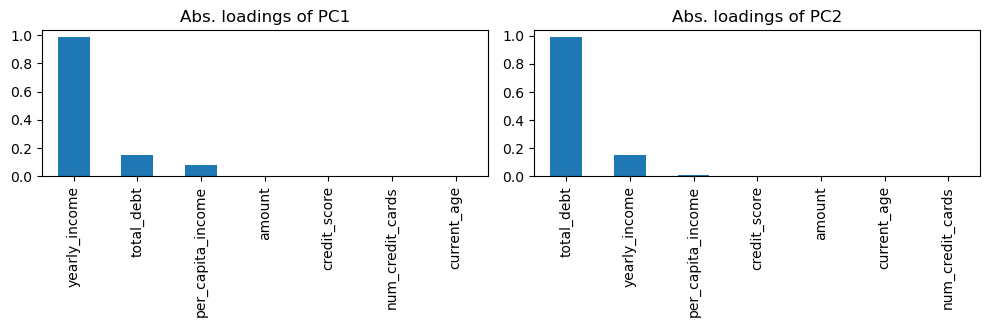

In [95]:
plt.figure(figsize = (10,8))
for i in range(len(df_selected.columns)):
    plt.subplot(3,2,i+1)
    abs(df_selected[df_selected.columns[i]]).T.sort_values(ascending = False).plot.bar()
    plt.yticks(np.arange(0,1.2,.2))
    plt.title('Abs. loadings of {}'.format(df_selected.columns[i]))
    plt.tight_layout()

Text(0.5, 1.0, 'Heatmap to display correlation')

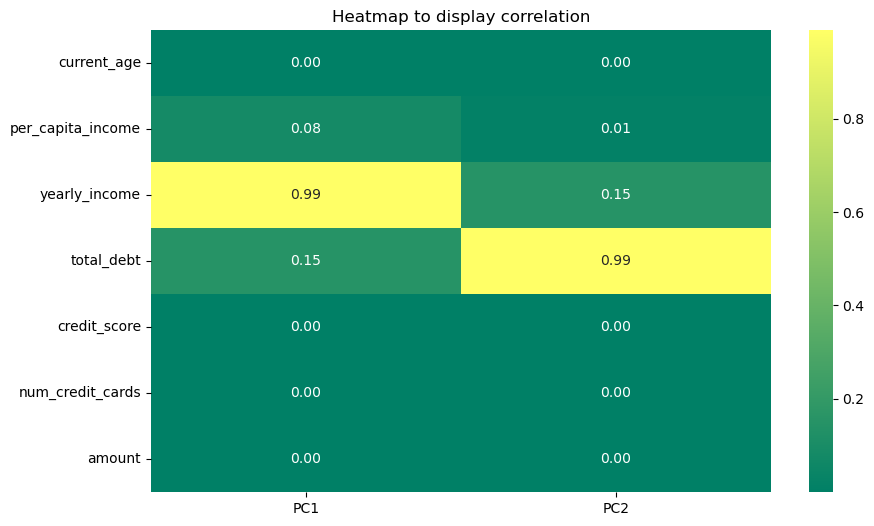

In [101]:
# Heatmap to display correlation
plt.figure(figsize = (10,6))
sns.heatmap(abs(df_selected), annot = True, cmap = 'summer',fmt = '.2f');
plt.title('Heatmap to display correlation')

In [103]:
pca = PCA(n_components=2, random_state=123)
pca_final = pca.fit_transform(df3)

In [105]:
pca_final_df = pd.DataFrame(pca_final, columns = df_selected.columns)
pca_final_df.head(10)

,PC1,PC2
0,402079.300027,113717.767721
1,149571.815187,-131983.290848
2,-396058.411212,-50150.464825
3,-377441.763870,-52942.955839
4,49281.012243,93277.623092
5,-77792.429398,-65855.147465
6,-349781.507125,-57091.434739
7,-326204.034147,-29493.157819
8,15932.967995,247952.015942
9,-386275.684288,-51617.623188


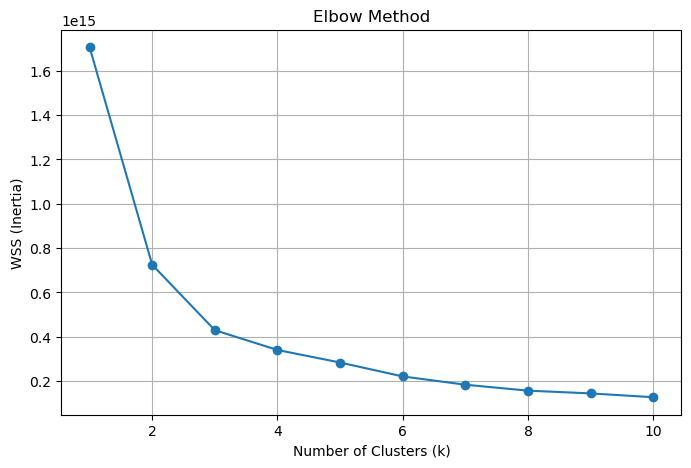

In [107]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wss = []

for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(pca_final_df)
    wss.append(km.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WSS (Inertia)")
plt.title("Elbow Method")
plt.grid()
plt.show()



In [109]:
wss

[1706640113640740.5,
 724833035545272.0,
 429616663190047.6,
 340295060379695.2,
 283712516053692.0,
 220986096068113.7,
 183544610548795.2,
 156815753152807.72,
 144361740728734.22,
 127133174576215.55]

In [111]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = pca_final_df.values   # Faster than using the dataframe directly
sil_scores = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = km.fit_predict(X)
    score = silhouette_score(X, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")


k = 2, Silhouette Score = 0.4831
k = 3, Silhouette Score = 0.4598
k = 4, Silhouette Score = 0.4427
k = 5, Silhouette Score = 0.4404
k = 6, Silhouette Score = 0.4282
k = 7, Silhouette Score = 0.3949
k = 8, Silhouette Score = 0.3970
k = 9, Silhouette Score = 0.3831
k = 10, Silhouette Score = 0.3757


In [113]:
# KMeans clustering
k_means = KMeans(n_clusters = 3)
k_means.fit(pca_final_df)
labels = k_means.labels_

In [117]:
df_no_outliers["K_Clusters"] = labels
df_no_outliers.head()

,id,current_age,birth_year,birth_month,gender,address,per_capita_income,yearly_income,total_debt,credit_score,...,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,K_Clusters
0,1,64,1961,3,Female,"Street 286, Indore, Madhya Pradesh - 452645",86125,1033501,280435,715,...,2024-03-28,CLTIND00104,CRD001042,1483.94,Yes,MCH00496,Mumbai,Maharashtra,452645,2
1,2,39,1986,12,Female,"Street 268, Kolkata, West Bengal - 700555",68414,820965,0,834,...,2025-09-20,CLTIND00213,CRD002132,1274.72,Yes,MCH00374,Mumbai,Maharashtra,700555,1
2,3,50,1975,7,Female,"Street 262, Lucknow, Uttar Pradesh - 226797",22595,271138,0,609,...,2024-10-02,CLTIND03292,CRD032922,7622.04,No,MCH00108,Kolkata,West Bengal,226797,0
3,4,27,1998,2,Male,"Street 265, Nagpur, Maharashtra - 440623",24158,289898,0,782,...,2023-09-02,CLTIND05205,CRD052053,3970.48,Yes,MCH00001,Indore,Madhya Pradesh,440623,0
5,6,23,2002,6,Female,"Street 161, Nagpur, Maharashtra - 440496",57403,688831,207894,652,...,2025-10-21,CLTIND01637,CRD016374,5533.61,Yes,MCH00127,Indore,Madhya Pradesh,440496,1


In [ ]:
from sklearn.metrics import silhouette_samples

sil_width = silhouette_samples(pca_final_df, labels)

In [ ]:
df['sil_width'] = sil_width
df.head()